## Problem Statements:

### Using Random forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

### Import libraries

In [104]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings('ignore')

### Reading the input csv file

In [105]:
data=pd.read_csv("/content/Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


### Check the statistics for basic understanding of the data

In [106]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


### Checking for the null values

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [108]:
data.shape

(600, 6)

### Checking for the duplicate values

In [109]:
data[data.duplicated(keep = False)]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


<Axes: ylabel='Count'>

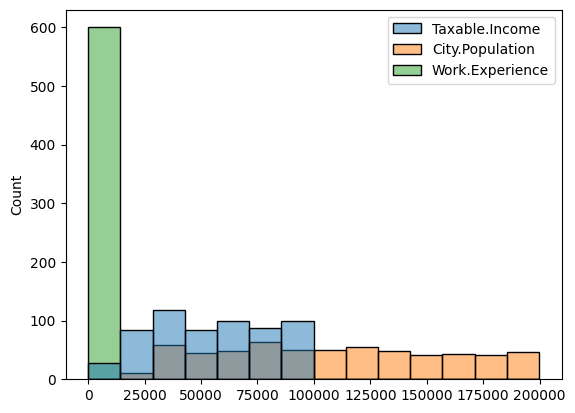

In [110]:
sns.histplot(data)

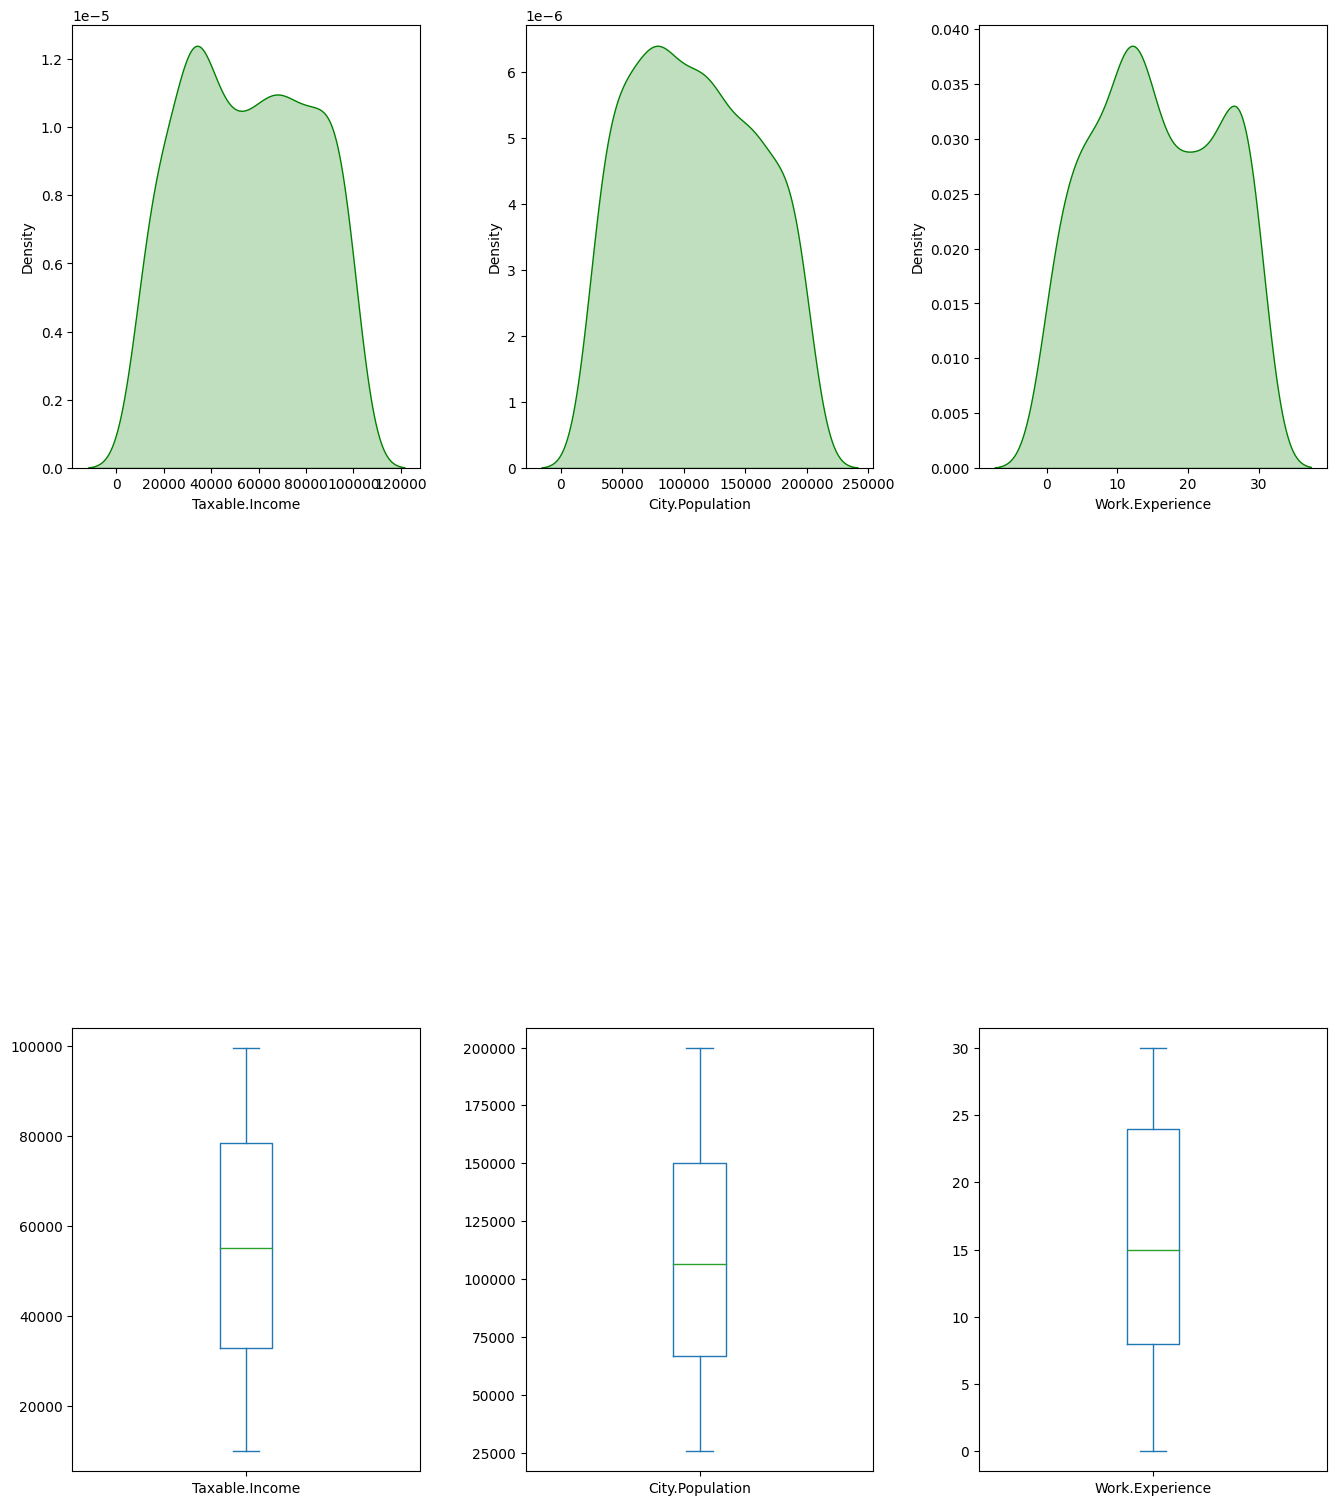

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [111]:
num_columns = data.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(data[col],color='g',shade=True)
    plt.subplot(8,4,i+8)
    data[col].plot.box()
plt.tight_layout()
plt.show()
num_data = data[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

### Create numerical variables for all categorical data, with label encoding

In [112]:
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status'])
data['Urban']= label_encoder.fit_transform(data['Urban'])

### Finding the average taxable income, which is 30000. Thus, anything above that can be considered as the income that is highly succesptable to riskier accounts

In [113]:
data["Taxable.Income"]=(data["Taxable.Income"]>30000)*1

### Assigning the values of independent and target varibales from the data to a new variable

In [114]:
x=data.drop(axis=0,columns="Taxable.Income")
y=data["Taxable.Income"]

In [115]:
data["Taxable.Income"].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

### Train test split at a ratio of 70:30

In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

### Constructing a Random forest classfier model

In [117]:
model = RandomForestClassifier(n_estimators=110, max_features=3)

In [118]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=110)

### Predicting the model on the train data, to evaluate the train accuracy

In [119]:
Y_pred=model.predict(x_train)

In [120]:
print("accuracy:",metrics.accuracy_score(y_train,Y_pred))

accuracy: 1.0


### Finding the train accuracy

In [121]:
model.score(x_train, y_train)

1.0

### Predicting the model on the test data

In [122]:
y_pred=model.predict(x_test)

In [123]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7111111111111111


### Finding the test accuracy

In [124]:
model.score(x_test, y_test)

0.7111111111111111

### Identifying the important features that contribute to the output and sorting it in ascending order

In [125]:
feature_imp = pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

City.Population    0.530169
Work.Experience    0.297042
Marital.Status     0.075419
Urban              0.049168
Undergrad          0.048201
dtype: float64

### Bar plot for representing the important features

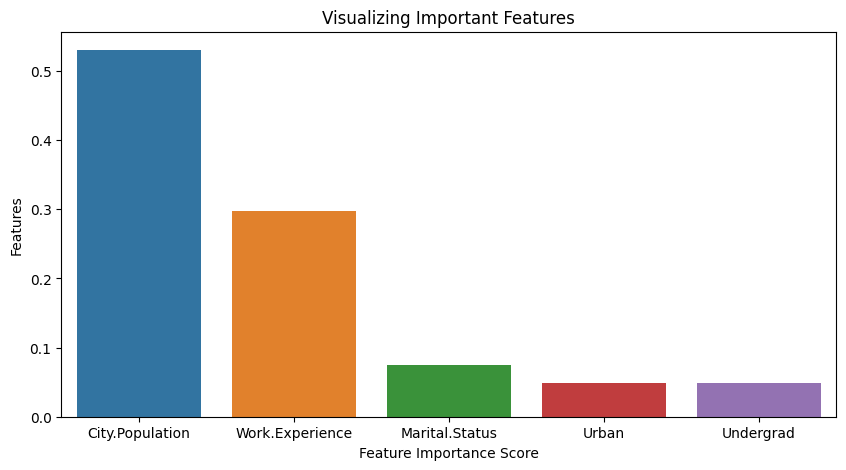

In [126]:
plt.figure(figsize=(10,5))
sns.barplot(y=feature_imp, x=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Running a loop from the range of 1 to 5 for different max_features in the Random forest classifier

In [127]:
train_accuracy = []
test_accuracy = []
for max_features in range(1,10):
    model=RandomForestClassifier(n_estimators=110, max_features=3)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

### Jotting down the test accuracies for different max_features of the Random Forest classifier

In [128]:
data = pd.DataFrame({'max_features':range(1,10),'train_acc':train_accuracy, 'test_acc':test_accuracy})
data

,max_features,train_acc,test_acc
0,1,1.0,0.700000
1,2,1.0,0.716667
2,3,1.0,0.711111
3,4,1.0,0.700000
4,5,1.0,0.705556
5,6,1.0,0.705556
6,7,1.0,0.700000
7,8,1.0,0.711111
8,9,1.0,0.700000


### Visualizing the accuracy graph for different max_depth parameters of the Random forest classifier

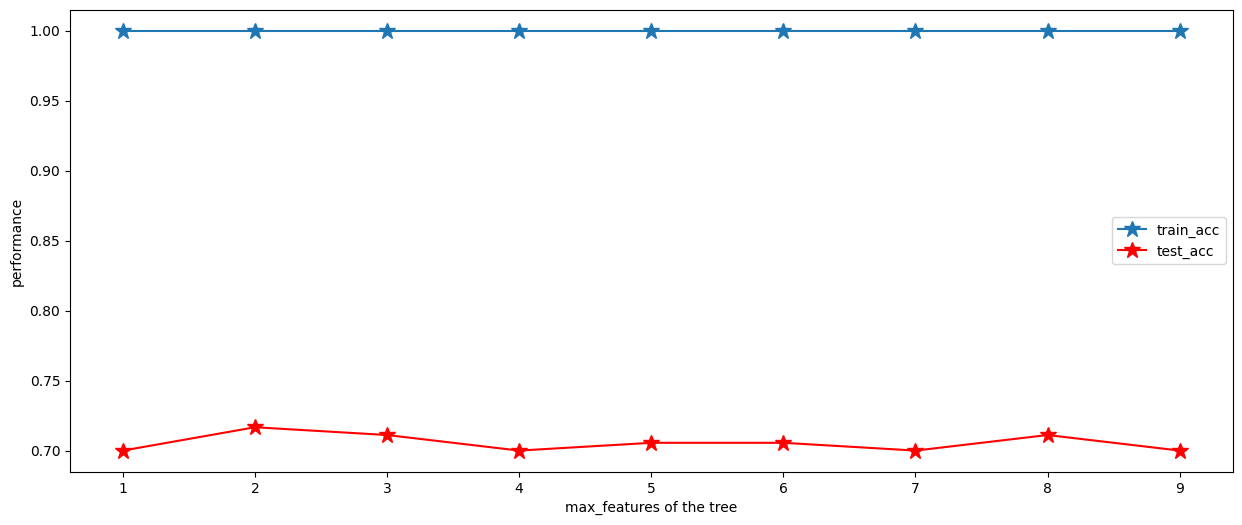

In [129]:
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(data['max_features'],data['train_acc'], marker = '*',markersize=12)
plt.plot(data['max_features'], data['test_acc'], marker = '*',markersize=12, color='red')
ax.set_xticks(np.arange(1,10))
plt.legend(labels)
plt.xlabel('max_features of the tree')
plt.ylabel('performance')
plt.show()

### Evaluation metric - Confusion matrix

In [130]:
cm= confusion_matrix(y_test, y_pred)
cm

array([[  1,  39],
       [ 13, 127]])

### Visualising the confusion Matrix with heatmap

Text(0.5, 1.0, 'Accuracy Score: 0.7')

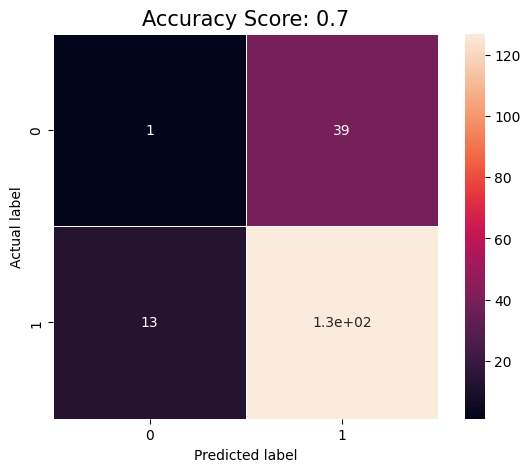

In [131]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

### Predicting the values of test data and viewing the classification report

In [132]:
y_pred = model.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.76      0.90      0.82       140

    accuracy                           0.70       180
   macro avg       0.38      0.45      0.41       180
weighted avg       0.59      0.70      0.64       180



### Trying a cross validation KFold split, to check if the accuracy of the model increases

In [133]:
kfold=KFold(n_splits=8,random_state=7,shuffle=True)

In [134]:
result=cross_val_score(model,x,y,cv=kfold)
print(result.mean())

0.7433333333333333


### Constructing an Adaboost classifier to classify the highes risk of fraud taxable income, with teh cross validation Kfold

In [135]:
num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)

### Evaluating the Adaboost classfier with Kfold and checking the accuracy  

In [136]:
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7933333333333332


### Evaluating the Adaboost classfier with the train test split and checking the accuracy  

In [137]:
model.fit(x_train,y_train)
print("accuracy:",model.score(x_train, y_train))

accuracy: 0.8023809523809524


### Predict the model on the test data

In [138]:
y_pred=model.predict(x_test)

In [139]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7722222222222223


### Consolidating

In [140]:
data

,max_features,train_acc,test_acc
0,1,1.0,0.700000
1,2,1.0,0.716667
2,3,1.0,0.711111
3,4,1.0,0.700000
4,5,1.0,0.705556
5,6,1.0,0.705556
6,7,1.0,0.700000
7,8,1.0,0.711111
8,9,1.0,0.700000


## Conclusion:

### It is evident that the highest accuracy from the Random forest classifier is, when it takes 1 maximum feature, of 76.6% . Thus, it can be used as the final model to predict and meet the objective of the problem.
### Also, the Adaboost classifier gives an accuracy of 77.23% to classify the data that has a higher risk of bein a fraud in taxable income.